# Smart Loan Recovery System

### Loan defaults pose a significant challenge for financial institutions by affecting profitability and cash flow. Using historical loan repayment data, borrower profiles, and payment behaviours, many financial companies now use a smart loan recovery system to optimize collection efforts, minimize recovery costs, and maximize loan repayments

In [2]:
import pandas as pd 
import numpy as np

In [57]:
df= pd.read_csv('loan-recovery.csv')

In [59]:
df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


# data info
Demographic Information: Age, employment type, income level, and number of dependents.

Loan Details: Loan amount, tenure, interest rate, and collateral value.

Repayment History: Number of missed payments, days past due, and monthly EMI payments.

Collection Efforts: Collection methods used, number of recovery attempts, and legal actions taken.

Loan Recovery Status: Whether the loan was fully recovered, partially recovered, or remains outstanding

In [5]:
df.shape

(500, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

# Summary Stat

In [7]:

df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


# NULL value Check 

In [20]:
df.isnull().sum()

Borrower_ID                0
Age                        0
Gender                     0
Employment_Type            0
Monthly_Income             0
Num_Dependents             0
Loan_ID                    0
Loan_Amount                0
Loan_Tenure                0
Interest_Rate              0
Loan_Type                  0
Collateral_Value           0
Outstanding_Loan_Amount    0
Monthly_EMI                0
Payment_History            0
Num_Missed_Payments        0
Days_Past_Due              0
Recovery_Status            0
Collection_Attempts        0
Collection_Method          0
Legal_Action_Taken         0
dtype: int64

No null Values

# Dulicates check

In [30]:
df.duplicated().sum()

0

NO Dplicates values

# EDA

# Analyzing Data Distribution and Relationships

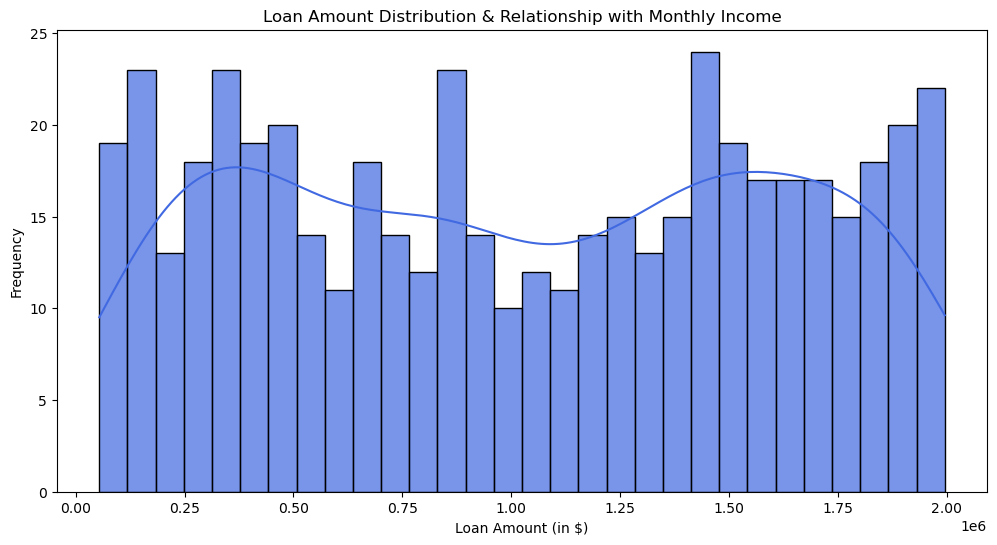

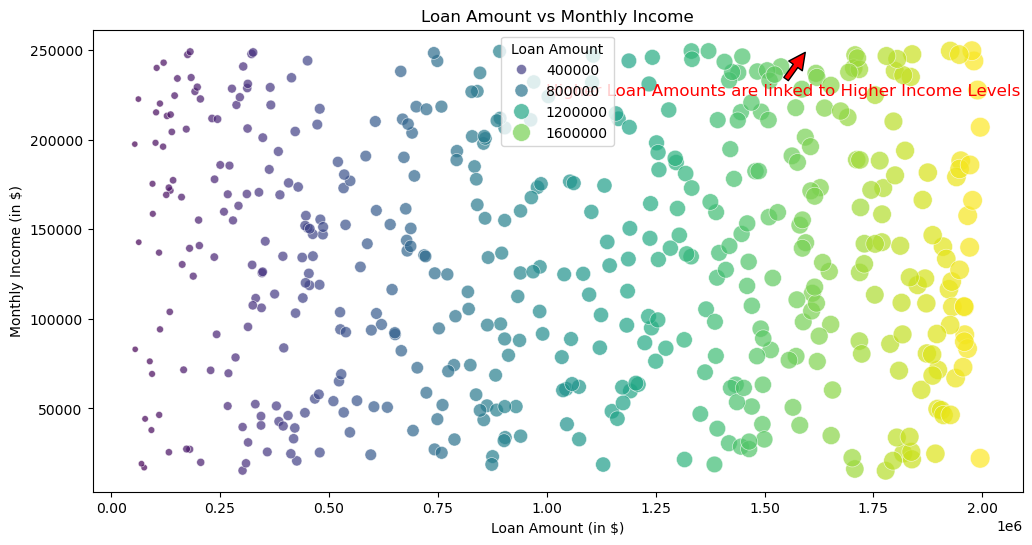

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Histogram with KDE (Density Curve)
sns.histplot(df['Loan_Amount'], bins=30, kde=True, color='royalblue', alpha=0.7)
plt.xlabel("Loan Amount (in $)")
plt.ylabel("Frequency")
plt.title("Loan Amount Distribution & Relationship with Monthly Income")

# Scatter plot for Loan Amount vs. Monthly Income
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=df, x='Loan_Amount', y='Monthly_Income', hue='Loan_Amount', size='Loan_Amount', sizes=(20, 200), palette='viridis', alpha=0.7)

# Annotation
plt.annotate("Higher Loan Amounts are linked to Higher Income Levels",
             xy=(max(df['Loan_Amount']) * 0.8, max(df['Monthly_Income'])), 
             xytext=(max(df['Loan_Amount']) * 0.5, max(df['Monthly_Income']) * 0.9),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color="red")

plt.xlabel("Loan Amount (in $)")
plt.ylabel("Monthly Income (in $)")
plt.title("Loan Amount vs Monthly Income")
plt.legend(title="Loan Amount")

plt.show()


The graph demonstrates a positive relationship between loan amounts and monthly income, indicating that individuals with higher income levels tend to secure larger loans.

It highlights the proportionality between income and loan size, which shows an income-based approach in loan approvals or customer profiling.

# Analyzing Payment History

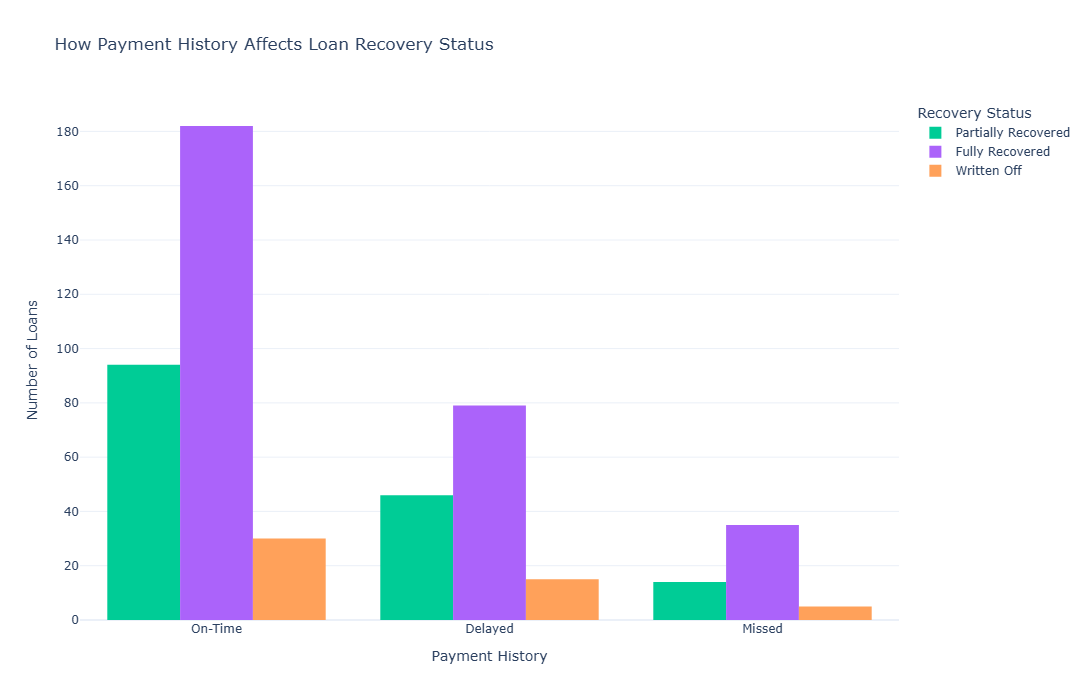

In [73]:
fig = px.histogram(df, x="Payment_History", color="Recovery_Status", barmode="group",
                   title="How Payment History Affects Loan Recovery Status",
                   labels={"Payment_History": "Payment History", "count": "Number of Loans"},
                   color_discrete_map={"Recovered": "green", "Not Recovered": "red"})

fig.update_layout(
    xaxis_title="Payment History",
    yaxis_title="Number of Loans",
    legend_title="Recovery Status",
    template="plotly_white",
    height=700
        )

fig.show()

Loans with on-time payments are mostly fully recovered. Delayed payments result in a mix of partial and full recoveries, with some written off. Missed payments have a significantly lower recovery rate, with most loans ending up either partially recovered or written off

# analyzing how missed payments affect loan recovery

C:\Users\91952\AppData\Local\Temp\ipykernel_17324\1477366126.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




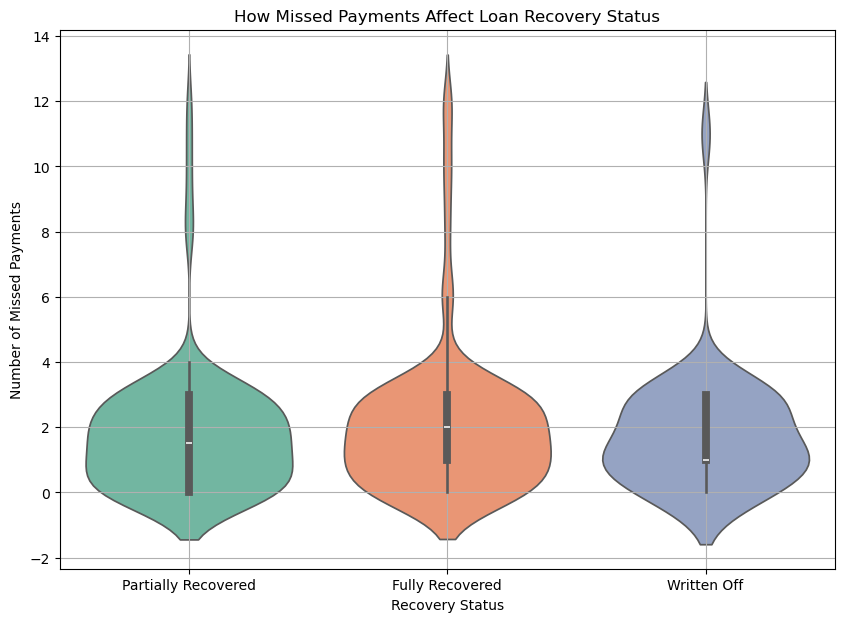

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # Increase figure size

# Create a violin plot
sns.violinplot(data=df, x="Recovery_Status", y="Num_Missed_Payments", palette="Set2")

# Labels and title
plt.xlabel("Recovery Status")
plt.ylabel("Number of Missed Payments")
plt.title("How Missed Payments Affect Loan Recovery Status")

plt.grid(True)  # Add grid for better readability
plt.show()


Loans with partial recovery typically have up to 4 missed payments. Fully recovered loans tend to have fewer missed payments, mostly between 0 and 2. Written-off loans show a higher range of missed payments, with several exceeding 6. A higher number of missed payments significantly reduces the likelihood of full recovery and increases the chances of loans being written off.

# Analyzing Loan Recovery Based on Monthly Income

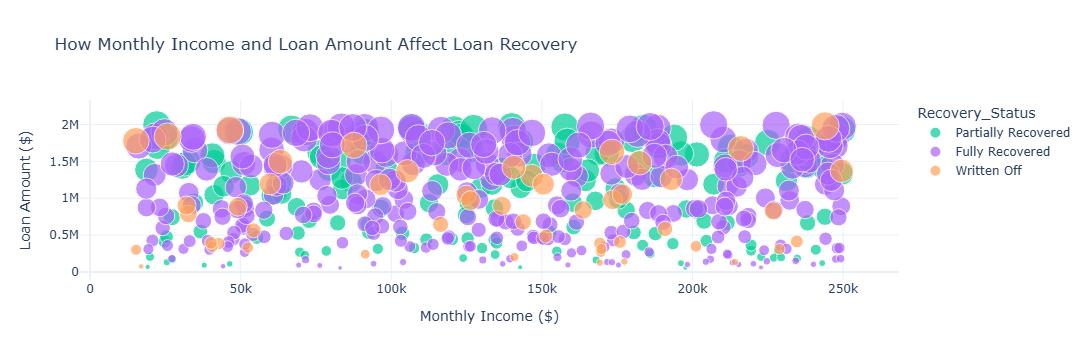

In [104]:
fig = px.scatter(df, x='Monthly_Income', y='Loan_Amount',
                 color='Recovery_Status', size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Recovery_Status': True},
                 title="How Monthly Income and Loan Amount Affect Loan Recovery",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)"},
                 color_discrete_map={"Recovered": "green", "Not Recovered": "red"})


fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white"
)

fig.show()

Higher-income individuals are more likely to fully recover their loans, even for larger amounts. Borrowers in lower income brackets face a higher likelihood of loan write-offs or partial recovery. This trend hi`ghlights the impact of income on loan recovery, as higher earnings lead to better repayment outcomes and fewer write-offs, even for substantial loans

# using K-Means clustering, I’ll create borrower segments based on monthly income and loan amount

In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

C:\Users\91952\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



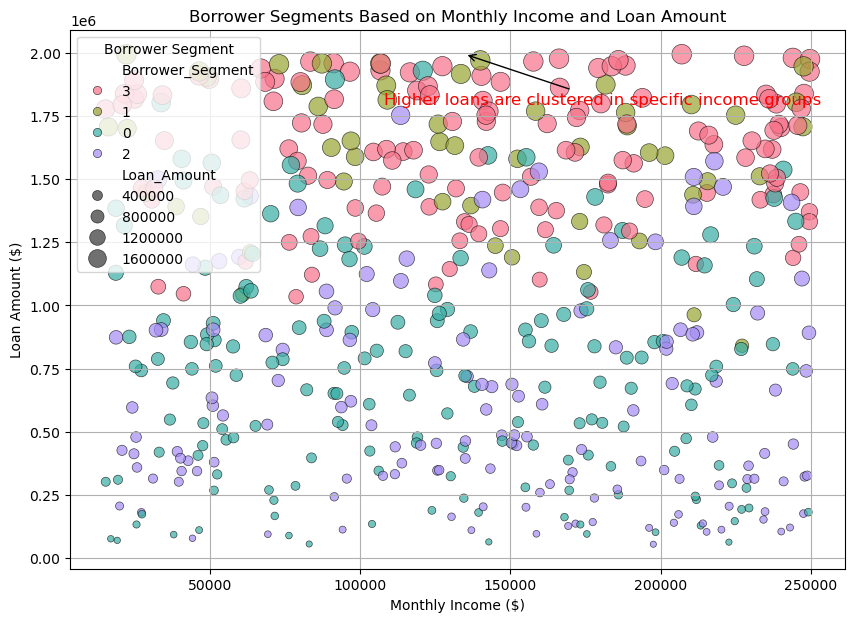

In [110]:

# Step 1: Perform K-Means Clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Borrower_Segment'] = kmeans.fit_predict(df_scaled)

# Step 2: Define a color palette for the clusters
palette = sns.color_palette("husl", optimal_k)  # Husl provides distinct colors

# Step 3: Create scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Monthly_Income', y='Loan_Amount', 
                hue=df['Borrower_Segment'].astype(str), 
                size='Loan_Amount', sizes=(20, 200), 
                palette=palette, alpha=0.7, edgecolor="black")

# Step 4: Add annotation
plt.annotate("Higher loans are clustered in specific income groups",
             xy=(df['Monthly_Income'].mean(), df['Loan_Amount'].max()),
             xytext=(df['Monthly_Income'].mean()*0.8, df['Loan_Amount'].max()*0.9),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=12, color="red")

# Step 5: Customize labels and title
plt.xlabel("Monthly Income ($)")
plt.ylabel("Loan Amount ($)")
plt.title("Borrower Segments Based on Monthly Income and Loan Amount")
plt.legend(title="Borrower Segment")

plt.grid(True)
plt.show()


Segment 1 borrowers take on moderate to high loan amounts, indicating financial stability. The Segment 0 clusters around lower income levels and moderate loan sizes, reflecting potential financial strain. Segment 2 borrowers distribute evenly across the graph, representing a balanced but cautious group. Meanwhile, Segment 3 borrowers concentrate in high-loan areas, especially within specific high-income ranges, highlighting their susceptibility to default despite higher incomes.

#  segments according to the clusters 

In [114]:

df['Segment_Name'] = df['Borrower_Segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})

#  build a classification model 

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df['High_Risk_Flag'] = df['Segment_Name'].apply(lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

# selecting features for the model
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = df[features]
y = df['High_Risk_Flag']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get risk scores (probability of being high risk)
risk_scores = rf_model.predict_proba(X_test)[:, 1]  # probability of high risk

# add risk scores and flags to test data
df_test = X_test.copy()
df_test['Risk_Score'] = risk_scores
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)  # Threshold at 50% probability

# merging with borrower details
df_test = df_test.merge(df[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
                        left_index=True, right_index=True)

 first labelled borrowers as high-risk based on their segment classification. Then selected key financial and behavioural features to train a Random Forest Classifier. After splitting the data into training and testing sets,it  trained the model to predict the probability of a borrower defaulting.  then i have applied this model to the test data to generate risk scores and classify borrowers as high-risk or low-risk based on a probability threshold. Finally, we merged these predictions with borrower details to enable data-driven recovery strategies.

# create a new column for the dynamic recovery strategy based on risk scores

In [124]:
# creating a new column for the dynamic recovery strategy based on risk scores
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)

df_test.head()

,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Borrower_ID,Segment_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery_Strategy
436,25,156826,1510049,60,16.22,8.373402e+05,3.296001e+05,5493.34,1,179,0.42,0,BRW_437,"High Loan, Higher Default Risk",Partially Recovered,Legal Notice,7,No,Automated reminders & monitoring
448,57,33752,1803767,12,8.30,0.000000e+00,4.411477e+05,36762.31,0,0,0.64,1,BRW_449,"Moderate Income, High Loan Burden",Fully Recovered,Calls,2,No,Settlement offers & repayment plans
88,27,71503,1898058,24,12.59,1.087594e+06,4.227607e+05,17615.03,2,179,0.76,1,BRW_89,"High Loan, Higher Default Risk",Fully Recovered,Debt Collectors,3,No,Immediate legal notices & aggressive recovery ...
145,59,215641,1492181,36,15.85,1.340937e+06,1.337482e+06,37152.29,3,125,0.32,0,BRW_146,"High Income, Low Default Risk",Fully Recovered,Calls,3,No,Automated reminders & monitoring
344,52,106658,1958911,36,12.09,2.128380e+06,1.592191e+06,44227.52,0,0,0.09,0,BRW_345,"High Income, Low Default Risk",Fully Recovered,Calls,0,No,Automated reminders & monitoring



defined a function that categorizes borrowers into three recovery approaches:

1) immediate legal action for high-risk borrowers (risk score > 0.75)

2) settlement offers and repayment plans for moderate-risk borrowers (0.50 – 0.75)

3) and automated reminders for low-risk borrowers (<0.50).

This function was applied to the test dataset to assign a personalized recovery strategy to each borrower to ensure cost-effective and targeted loan recovery efforts.

 by leveraging borrower profiles, payment behaviours, and clustering techniques, we can build a smart loan recovery system to identify high-risk borrowers early and assign targeted recovery strategies based on risk levels